In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

In [3]:
common_tetramers = pd.read_csv('../../data/common_tetramers_v2.csv')
common_hexamers = pd.read_csv('../../data/common_hexamers_v2.csv')

In [4]:
common_tetramers_dft = pd.read_csv('../../data/common_tetramers_DFT_lambda.csv')
common_hexamers_dft = pd.read_csv('../../data/common_hexamers_DFT_lambda.csv')

In [5]:
hexamers_dft = pd.read_csv('../../data/Common_Hexamers_DFT_Angle_Length.csv')

In [5]:
hexamers_dft = hexamers_dft.rename(columns = {'Cation Angle':'DFT Cation Angle','Cation Bond Length':'DFT Cation Bond Length','Neutral Angle':'DFT Neutral Angle','Neutral Bond Length':'DFT Neutral Bond Length'})

In [6]:
hexamers_dft.drop('Round', axis = 1, inplace = True)

In [7]:
hexamers_dft['Delta DFT Angle'] = abs(hexamers_dft['DFT Cation Angle'] - hexamers_dft['DFT Neutral Angle'])
hexamers_dft['Delta DFT Bond Length'] = abs(hexamers_dft['DFT Cation Bond Length'] - hexamers_dft['DFT Neutral Bond Length'])

In [8]:
hexamers_dft.head()

,Molecule,DFT Cation Angle,DFT Cation Bond Length,DFT Neutral Angle,DFT Neutral Bond Length,Delta DFT Angle,Delta DFT Bond Length
0,110-115_AB3,172.234791,1.397181,170.055737,1.417195,2.179054,0.020014
1,110-176_AB3,172.820527,1.396623,170.971217,1.415660,1.849311,0.019036
2,110-261_AB3,173.522701,1.399022,170.009339,1.417354,3.513362,0.018332
3,110-283_AB3,173.157927,1.394611,169.588614,1.412834,3.569313,0.018224
4,115-147_AB3,176.594217,1.402163,172.841792,1.421341,3.752425,0.019178


In [9]:
common_tetramers['Molecule'] = common_tetramers['Monomer 1'].astype(int).astype(str) + '-' + common_tetramers['Monomer 2'].astype(int).astype(str) + '_ABAB'
common_tetramers['Delta Angle'] = abs(common_tetramers['Neutral Angle'] - common_tetramers['Cation Angle'])
common_tetramers['Delta Bond'] = abs(common_tetramers['Neutral Bond Length'] - common_tetramers['Cation Bond Length'])
common_tetramers = common_tetramers.merge(common_tetramers_dft, on = ['Molecule'])
common_tetramers = common_tetramers[['Molecule', 'Trained λ', 'DFT λ', 'Neutral Angle', 'Cation Angle', 'Delta Angle', 'Neutral Bond Length', 'Cation Bond Length', 'Delta Bond' ]]
common_tetramers['PctDiff'] = (abs(common_tetramers['DFT λ']-common_tetramers['Trained λ'])/common_tetramers['DFT λ'])*100

In [10]:
common_hexamers['Molecule'] = common_hexamers['Monomer 1'].astype(int).astype(str) + '-' + common_hexamers['Monomer 2'].astype(int).astype(str) + '_AB3'
common_hexamers['Delta Angle'] = abs(common_hexamers['Neutral Angle'] - common_hexamers['Cation Angle'])
common_hexamers['Delta Bond'] = abs(common_hexamers['Neutral Bond Length'] - common_hexamers['Cation Bond Length'])
common_hexamers = common_hexamers.merge(common_hexamers_dft, on = ['Molecule'])
common_hexamers = common_hexamers[['Molecule', 'Trained λ', 'DFT λ', 'Neutral Angle', 'Cation Angle', 'Delta Angle', 'Neutral Bond Length', 'Cation Bond Length', 'Delta Bond' ]]
common_hexamers['PctDiff'] = (abs(common_hexamers['DFT λ']-common_hexamers['Trained λ'])/common_hexamers['DFT λ'])*100

In [11]:
pd.set_option('display.max_rows', None)
pd.options.display.float_format = "{:,.3f}".format
common_hexamers.sort_values(['DFT λ']).reset_index(drop = True).head()

,Molecule,Trained λ,DFT λ,Neutral Angle,Cation Angle,Delta Angle,Neutral Bond Length,Cation Bond Length,Delta Bond,PctDiff
0,47-47_AB3,0.120,0.051,179.308,179.371,0.063,1.381,1.378,0.004,132.545
1,47-116_AB3,0.141,0.081,179.693,179.727,0.034,1.390,1.385,0.005,73.368
2,47-156_AB3,0.178,0.086,177.520,177.935,0.415,1.388,1.383,0.006,107.211
3,47-247_AB3,0.147,0.088,179.201,178.849,0.352,1.388,1.383,0.005,65.823
4,47-217_AB3,0.146,0.094,179.460,179.493,0.032,1.393,1.387,0.006,55.884


In [12]:
all_common_hex = common_hexamers.rename(columns = {'Cation Angle':'GFN Cation Angle','Cation Bond Length':'GFN Cation Bond Length','Neutral Angle':'GFN Neutral Angle','Neutral Bond Length':'GFN Neutral Bond Length','Delta Angle':'GFN Delta Angle','Delta Bond':'GFN Delta Bond Length'}).merge(hexamers_dft, on = ['Molecule'])

In [13]:
all_common_hex.columns

Index(['Molecule', 'Trained λ', 'DFT λ', 'GFN Neutral Angle',
       'GFN Cation Angle', 'GFN Delta Angle', 'GFN Neutral Bond Length',
       'GFN Cation Bond Length', 'GFN Delta Bond Length', 'PctDiff',
       'DFT Cation Angle', 'DFT Cation Bond Length', 'DFT Neutral Angle',
       'DFT Neutral Bond Length', 'Delta DFT Angle', 'Delta DFT Bond Length'],
      dtype='object')

In [14]:
for idx, row in all_common_hex.sort_values('DFT λ')[:5].iterrows():
    m1 = row['Molecule'].split('-')[0]
    m2 = row['Molecule'].split('-')[1].split('_')[0]
    print('{} & {} & {:.3f} & {:.3f} & {:.3f} & {:.3f} & {:.3f} & {:.3f} \\\\'.format(m1,m2, row['Trained λ'], row['DFT λ'], row['GFN Delta Angle'], row['Delta DFT Angle'], row['GFN Delta Bond Length'], row['Delta DFT Bond Length']))

47 & 47 & 0.120 & 0.051 & 0.063 & 0.005 & 0.004 & 0.005 \\
47 & 116 & 0.141 & 0.081 & 0.034 & 0.097 & 0.005 & 0.008 \\
47 & 156 & 0.178 & 0.086 & 0.415 & 0.019 & 0.006 & 0.010 \\
47 & 247 & 0.147 & 0.088 & 0.352 & 1.628 & 0.005 & 0.010 \\
47 & 217 & 0.146 & 0.094 & 0.032 & 4.460 & 0.006 & 0.012 \\


In [15]:
print('Monomer 1, Monomer 2, GNF2 N-Angle, GFN2 C-Angle, DFT N-Angle, DFT C-Angle, GFN2 N-Bond, GFN2 C-Bond, DFT N-Bond, DFT C-Bond')
for idx, row in all_common_hex.sort_values('DFT λ')[:5].iterrows():
    m1 = row['Molecule'].split('-')[0]
    m2 = row['Molecule'].split('-')[1].split('_')[0]
    print('{} & {} & {:.3f} & {:.3f} & {:.3f} & {:.3f} & {:.3f} & {:.3f} & {:.3f} & {:.3f} \\\\'.format(m1,m2, row['GFN Neutral Angle'], row['GFN Cation Angle'], row['DFT Neutral Angle'], row['DFT Cation Angle'], row['GFN Neutral Bond Length'], row['GFN Cation Bond Length'], row['DFT Neutral Bond Length'], row['DFT Cation Bond Length']))

Monomer 1, Monomer 2, GNF2 N-Angle, GFN2 C-Angle, DFT N-Angle, DFT C-Angle, GFN2 N-Bond, GFN2 C-Bond, DFT N-Bond, DFT C-Bond
47 & 47 & 179.308 & 179.371 & 179.999 & 179.994 & 1.381 & 1.378 & 1.379 & 1.374 \\
47 & 116 & 179.693 & 179.727 & 178.576 & 178.674 & 1.390 & 1.385 & 1.397 & 1.389 \\
47 & 156 & 177.520 & 177.935 & 179.979 & 179.997 & 1.388 & 1.383 & 1.397 & 1.387 \\
47 & 247 & 179.201 & 178.849 & 178.099 & 179.726 & 1.388 & 1.383 & 1.401 & 1.390 \\
47 & 217 & 179.460 & 179.493 & 175.533 & 179.994 & 1.393 & 1.387 & 1.403 & 1.391 \\


In [16]:
pd.set_option('display.max_rows', None)
pd.options.display.float_format = "{:,.3f}".format
common_tetramers.sort_values(['DFT λ']).reset_index(drop = True)

,Molecule,Trained λ,DFT λ,Neutral Angle,Cation Angle,Delta Angle,Neutral Bond Length,Cation Bond Length,Delta Bond,PctDiff
0,47-261_ABAB,0.201,0.155,179.850,179.458,0.392,1.398,1.388,0.010,29.685
1,47-283_ABAB,0.181,0.166,179.658,179.640,0.018,1.396,1.386,0.011,9.252
2,47-110_ABAB,0.186,0.171,173.777,174.629,0.852,1.391,1.383,0.008,8.930
3,47-309_ABAB,0.206,0.171,179.201,179.552,0.351,1.402,1.391,0.011,20.269
4,47-236_ABAB,0.209,0.173,179.738,179.871,0.134,1.399,1.388,0.011,20.969
5,43-261_ABAB,0.223,0.175,179.562,179.763,0.200,1.407,1.394,0.013,27.483
6,46-261_ABAB,0.204,0.176,179.444,179.719,0.275,1.402,1.391,0.011,15.902
7,47-106_ABAB,0.220,0.176,177.006,177.830,0.824,1.396,1.385,0.011,24.966
8,42-261_ABAB,0.231,0.183,179.546,179.587,0.041,1.407,1.394,0.013,26.452
9,43-283_ABAB,0.230,0.183,179.201,179.205,0.004,1.405,1.392,0.013,25.258


In [17]:
all_df = pd.concat([common_hexamers,common_tetramers])

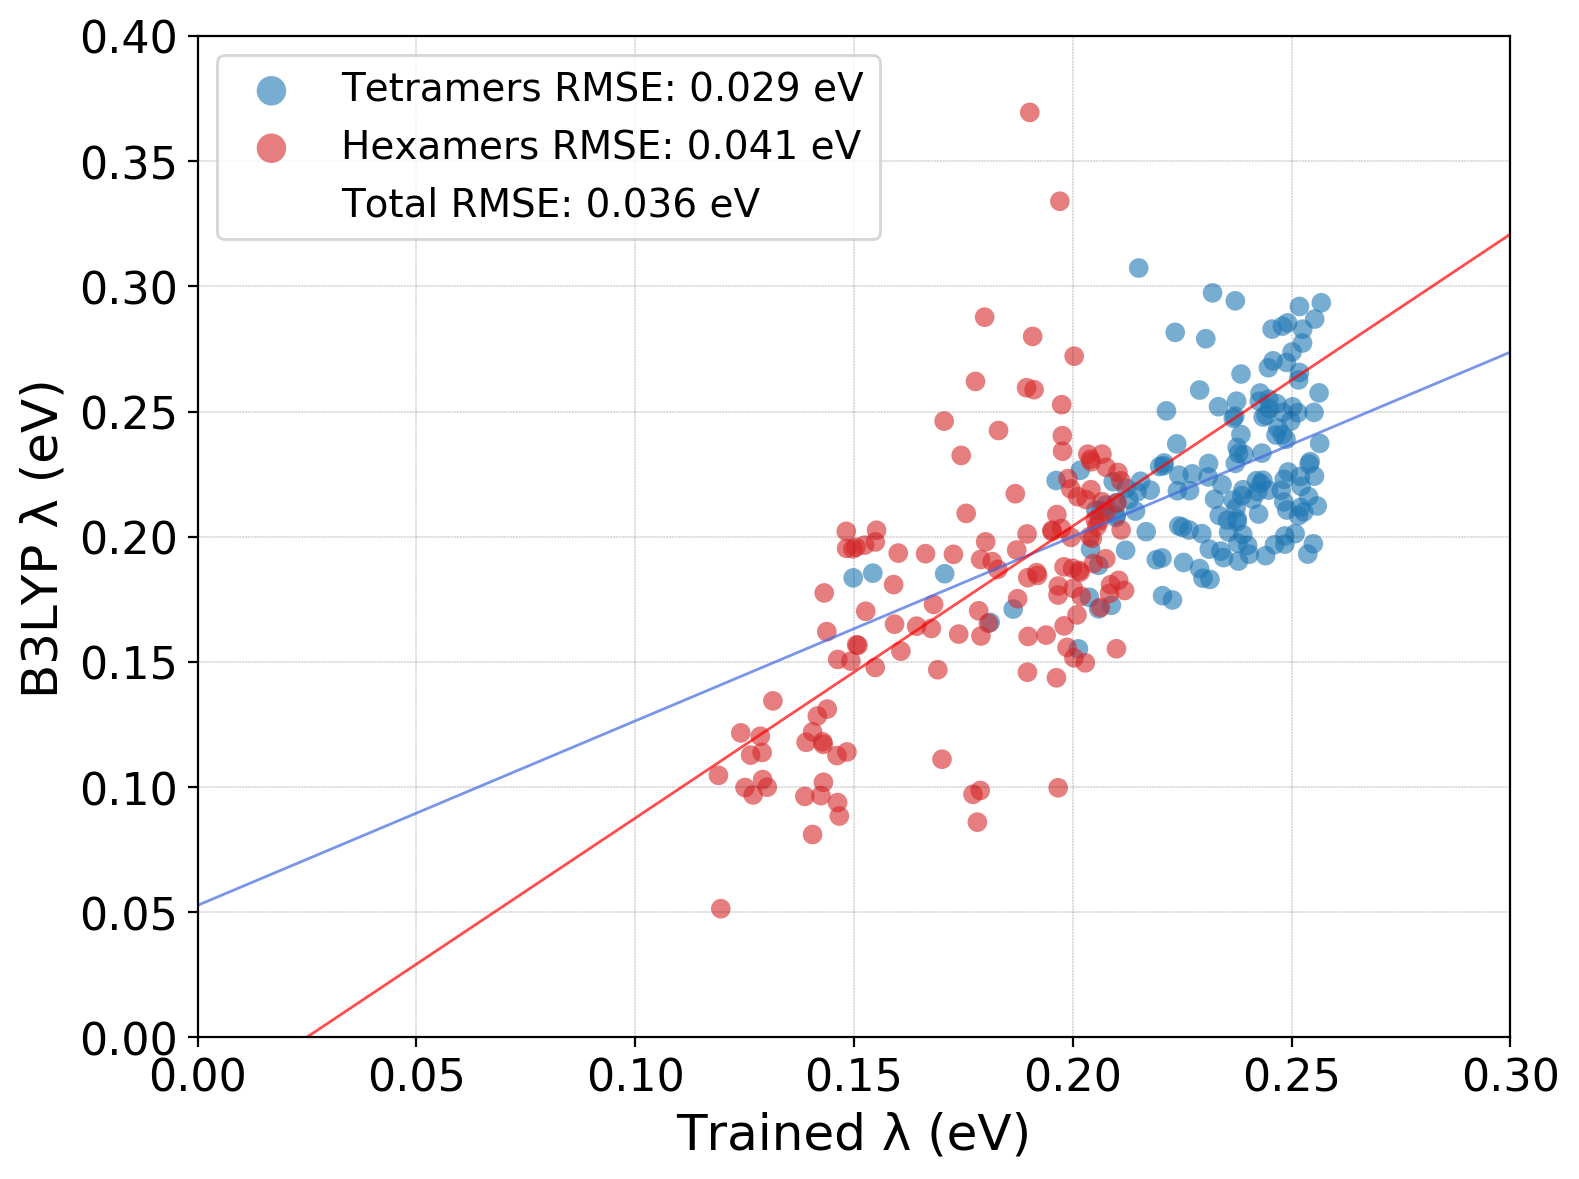

In [18]:
fig=plt.figure(figsize=(8, 6), dpi= 200, facecolor='w', edgecolor='k')
plt.xlim(0,0.3)
plt.ylim(0,0.4)
plt.grid(color='k', ls = '-.', lw = 0.1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
reg_x = np.arange(0,0.5,0.1)
tetra = plt.scatter(common_tetramers['Trained λ'], common_tetramers['DFT λ'], s = 50, color = 'tab:blue', edgecolors = 'none', alpha = 0.6, label = 'Tetramers')
hexa = plt.scatter(common_hexamers['Trained λ'], common_hexamers['DFT λ'], s = 50, color = 'tab:red', edgecolors = 'none', alpha = 0.6, label = 'Hexamers')
slope, intercept, r_value, p_value, std_err = linregress(common_tetramers['Trained λ'], common_tetramers['DFT λ'])
tetra_rmse = sqrt(mean_squared_error(common_tetramers['Trained λ'], common_tetramers['DFT λ']))
plt.plot(reg_x,slope*reg_x + intercept, c = 'royalblue', lw = 1, alpha = 0.7)
#plt.annotate("Tetramers RMSE = " + str(round(tetra_rmse,4)) + ' eV', xy = (0.54,0.1), xycoords='axes fraction')
slope, intercept, r_value, p_value, std_err = linregress(common_hexamers['Trained λ'], common_hexamers['DFT λ'])
hexa_rmse = sqrt(mean_squared_error(common_hexamers['Trained λ'], common_hexamers['DFT λ']))
total_rmse = sqrt(mean_squared_error(all_df['Trained λ'], all_df['DFT λ']))
total = matplotlib.patches.Rectangle((0,0), 1, 1, fill=False, edgecolor='none', visible=False)

plt.plot(reg_x,slope*reg_x + intercept, c = 'red', lw = 1, alpha = 0.7)
#plt.annotate("Hexamers RMSE = " + str(round(hexa_rmse,4)) + ' eV', xy = (0.543,0.05), xycoords='axes fraction')
plt.xlabel('Trained λ (eV)', fontsize = 18)
plt.ylabel('B3LYP λ (eV)', fontsize = 18)
plt.legend([tetra, hexa, total], ['Tetramers RMSE: ' + str(round(tetra_rmse,3)) + ' eV', 'Hexamers RMSE: ' + str(round(hexa_rmse,3)) + ' eV', 'Total RMSE: ' + str(round(total_rmse,3)) + ' eV'], markerscale = 1.5, fontsize = 14, loc = 2)
plt.tight_layout()
plt.savefig('common_correlations.pdf')
#plt.savefig('common_correlations.png')
plt.show()

In [8]:
slope, intercept, r_value, p_value, std_err = linregress(common_tetramers['Trained λ Average'], common_tetramers['DFT λ'])
print('Tetramers R^2:', r_value**2)
rmse = sqrt(mean_squared_error(common_tetramers['Trained λ Average'], common_tetramers['DFT λ']))
print('Tetramers RMSE:', rmse)

Tetramers R^2: 0.207270496794
Tetramers RMSE: 0.03555147907085977


In [9]:
slope, intercept, r_value, p_value, std_err = linregress(common_hexamers['Trained λ Average'], common_hexamers['DFT λ'])
print('Hexamers R^2:', r_value**2)
rmse = sqrt(mean_squared_error(common_hexamers['Trained λ Average'], common_hexamers['DFT λ']))
print('Hexamers RMSE:', rmse)

Hexamers R^2: 0.357020231072
Hexamers RMSE: 0.040847121606863636
